In [1]:
import warnings
from helper import load_env

warnings.filterwarnings('ignore')
load_env()

In [2]:
import requests

from typing import List

from haystack import Document, Pipeline, component
from haystack.components.builders import PromptBuilder
from haystack.components.generators.openai import OpenAIGenerator
from haystack.components.fetchers import LinkContentFetcher
from haystack.components.converters import HTMLToDocument
import pandas as pd
from typing import Dict, List, Optional

In [3]:
import os

In [4]:
from pathlib import Path

In [6]:
class FileManager:
    """
    A class to handle file operations, including saving job data to a CSV file.
    """

    def __init__(self, directory: str = "output"):
        self.directory = directory
        Path(self.directory).mkdir(parents=True, exist_ok=True)
        self.csv_file = os.path.join(self.directory, "job_data.csv")

    def save_to_csv(self, data: List[Dict[str, str]]):
        df = pd.DataFrame(data)
        if not os.path.exists(self.csv_file):
            df.to_csv(self.csv_file, index=False, mode='w', encoding='utf-8')
        else:
            df.to_csv(self.csv_file, index=False, mode='a', header=False, encoding='utf-8')

    def list_files(self) -> List[str]:
        return os.listdir(self.directory)

In [7]:
@component
class JobDataConverter:
    """
    A component that converts job data from a dictionary to a list of Document objects and stores them in a CSV file.
    """

    def __init__(self):
        self.file_manager = FileManager()

    @component.output_types(documents=List[Document], dataframe=pd.DataFrame)
    def run(self, job_data: Dict[str, str], return_df: bool = False) -> dict:
        documents = []
        data_rows = []

        for title, description in job_data.items():
            document = Document(content=description, meta={"title": title})
            documents.append(document)
            data_rows.append({"Title": title, "Description": description})

        # Append new job data to the CSV file
        self.file_manager.save_to_csv(data_rows)

        results = {"documents": documents}

        if return_df:
            df = pd.DataFrame(data_rows)
            results["dataframe"] = df

        return results

In [22]:
job_data = {
    "Data and AI Partner": """Junior Generative AI Engineer
Alemania · hace 3 días · Más de 100 solicitudes
En remoto  Jornada completa  Sin experiencia
8 de 10 aptitudes coinciden con tu perfil, podrías encajar muy bien
Ve una comparación con otros 100 solicitantes. Volver a probar Premium por 0 €

Solicitud sencilla

Guardar
Guardar «Junior Generative AI Engineer» en THRYVE
Junior Generative AI Engineer
THRYVE · Alemania (En remoto)

Solicitud sencilla

Guardar
Guardar «Junior Generative AI Engineer» en THRYVE
Mostrar más opciones
Acerca del empleo
Junior AI Engineer

Location: Remote in Germany or Hybrid in Münster

Salary: Up to 65k



***MUST SPEAK FLUENT GERMAN ****



Exciting AI Engineer Opportunity - Join Our the revolution everyone is talking about!



Are you ready to elevate your career in AI engineering? My client is looking for excited and aspiring AI engineers to join their team! They are in demand creating cutting-edge generative-first chatbot platform, DialogBits, is soaring, and need skilled AI Engineers to keep up with the pace They are not just users of AI; they're pioneers. Dive into the world of (generative) AI, pushing boundaries and stay on the forefront of technology.



Your Role:

- AI Solutions Development: Contribute to the evolution of our AI solutions.

- Generative Retrieval: Shape and adapt our augmented generative retrieval approaches.

- LLM Training: Drive the (further) training of Language Models.

- Innovation Evaluation: Assess and implement new methods and technologies.

- Bug Fixing & Maintenance :Keep our solutions in top-notch condition.

- Operations :Dive into the day-to-day operation of AI solutions.

- Quality Evaluation: Ensure our solutions meet the highest standards of quality, performance, and reliability.



Tech-Stack:

- Python, PyTorch, Huggingface, Redis, Elastic



Requirements:

- Programming Skills:Strong Python skills; knowledge of C/C++ or Rust is a plus.

- Foundation Models: Experience with LLama2 or Falcon is a plus.

- Technical Know-How: Transformers & embeddings, Docker & Kubernetes

- Mindset: Hands-on mentality; willingness to tackle tasks directly

- Education: Master's or PhD in mathematics, computer science, business informatics, or related field with an average grade of 2.2 or better.

- Professional Experience:Ideally 1-2 years post-graduation in AI engineering or related roles.



Apply now to be part of a team that's shaping the future of AI!""",
}

In [23]:
# Initialize the JobDataConverter
job_data_converter = JobDataConverter()

In [24]:
# Run the conversion
results = job_data_converter.run(job_data, return_df=False)

In [25]:
results

{'documents': [Document(id=a17e015727a03c62e74a0e5f196e280c155a68ccfa7c66f7a5c3e712a1ba4d54, content: 'Junior Generative AI Engineer
  Alemania · hace 3 días · Más de 100 solicitudes
  En remoto  Jornada com...', meta: {'title': 'Data and AI Partner'})]}

In [26]:
template = """ You will receive a dataframe 

{{dataframe}}

containing a job title and a job description,
from which you have to extract the following information:
- Job Title
- Company
- Location
- Link to the job posting
- Skills required
- Tech stack
- Responsibilities
- Qualifications
- Experience required
- Salary range
"""
prompt = PromptBuilder(template=template)
llm = OpenAIGenerator()

In [27]:

# Initialize the component and build the pipeline
job_data_converter = JobDataConverter()
cv_pipeline = Pipeline()
cv_pipeline.add_component("job_data_converter", job_data_converter)
cv_pipeline.add_component("prompt", prompt)
cv_pipeline.add_component("llm", llm)

cv_pipeline.connect("job_data_converter.dataframe", "prompt.dataframe")
cv_pipeline.connect("prompt", "llm")

🚅 Components
  - job_data_converter: JobDataConverter
  - prompt: PromptBuilder
  - llm: OpenAIGenerator
🛤️ Connections
  - job_data_converter.dataframe -> prompt.dataframe (DataFrame)
  - prompt.prompt -> llm.prompt (str)

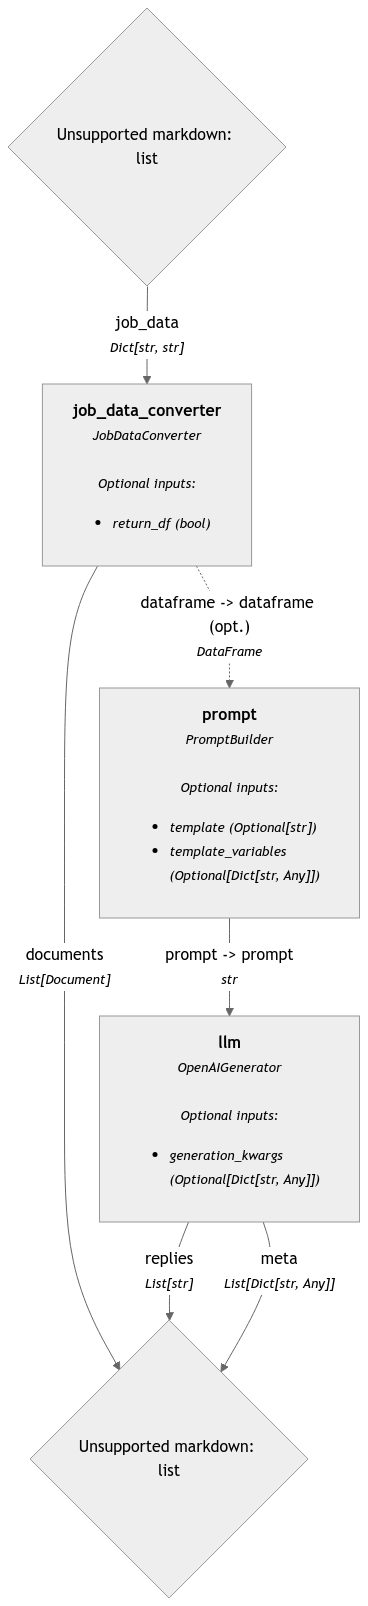

In [28]:
cv_pipeline.show()

In [ ]:
cv_pipeline.run({"job_data_converter": {"job_data":job_data}})

AttributeError: 'str' object has no attribute 'items'

In [16]:
pipeline_test

{'job_data_converter': {'documents': [Document(id=6a6846a9cca2980105d104e2e693ed4a0723a454532cd18069f7987a25a7594e, content: 'https://www.linkedin.com/jobs/collections/recommended/?currentJobId=4046730724
   
   Alemania · Publicado...', meta: {'title': 'Data and AI Partner'})]}}